
# 🩺 Projet 4 - Data Analyst  
## Réalisez une étude de santé publique avec R ou Python

Bienvenue dans ce notebook Jupyter, l’outil privilégié des analystes de données.  
Vous y trouverez un environnement interactif permettant d’écrire du code, de visualiser les résultats instantanément et de documenter vos analyses de manière claire et structurée.



## 🎯 Objectif de ce notebook

Ce notebook a pour objectif de vous guider dans l’analyse de données relatives à la santé publique. Il vous permettra de :

- Charger et explorer les données fournies.
- Réaliser des calculs statistiques utiles à l’analyse.
- Visualiser vos résultats à l’aide de graphiques.
- Interpréter vos résultats dans le contexte de la nutrition mondiale.

---

> 💡 **Astuce** : N’hésitez pas à modifier et tester chaque cellule pour mieux comprendre leur fonctionnement.  
> Il n’y a pas une seule bonne réponse : chaque analyste peut avoir une approche différente !


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [63]:
#Importation de la librairie Pandas
import pandas as pd


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [64]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [65]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [66]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne".format(population.shape[0]))
#La nature des données dans chacune des colonnes
print("Voici le type de données de chaque colonne :")
print(population.dtypes) 

#Le nombre de valeurs présentes dans chacune des colonnes
print("Voici les valeurs présente dans les colonnes :")
print(population.count())



Le tableau comporte 1416 colonne
Voici le type de données de chaque colonne :
Zone       object
Année       int64
Valeur    float64
dtype: object
Voici les valeurs présente dans les colonnes :
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [67]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [68]:
#Affichage les 5 premières lignes de la table
population.round(2).head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.59
1,Afghanistan,2014,33370.79
2,Afghanistan,2015,34413.60
3,Afghanistan,2016,35383.03
4,Afghanistan,2017,36296.11


In [69]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population = pd.DataFrame(population)
population['Valeur'] = population['Valeur'] * 1000

print(population)

             Zone  Année      Valeur
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [70]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'} , inplace=True)

print(population)

             Zone  Année  Population
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [71]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head(5))

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [72]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


### 🍽️ Analyse de la disponibilité alimentaire

In [73]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))
#dispo_alimentaire.info()

Le tableau comporte 18 colonnes


### 🍽️ Analyse de la disponibilité alimentaire

In [74]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


### 🍽️ Analyse de la disponibilité alimentaire

In [75]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

### 🍽️ Analyse de la disponibilité alimentaire

In [76]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire = pd.DataFrame(dispo_alimentaire)
colonne_a_multiplier = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']
dispo_alimentaire[colonne_a_multiplier] = dispo_alimentaire[colonne_a_multiplier]* 1000000

### 🍽️ Analyse de la disponibilité alimentaire

In [77]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [78]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[1]))


Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 observation(s) ou article(s)


In [79]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [80]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head(5))

  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [81]:
#changement du nom de la colonne Pays bénéficiaire par Zone
#aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)  
aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)
aide_alimentaire.rename(columns={"Valeur": "Aide Alimentaire"}, inplace=True)


In [82]:
aide_alimentaire.head(5)

,Zone,Année,Produit,Aide Alimentaire
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [83]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Aide Alimentaire'] = aide_alimentaire['Aide Alimentaire'] * 1000

In [84]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head(5))

          Zone  Année              Produit  Aide Alimentaire
0  Afghanistan   2013  Autres non-céréales            682000
1  Afghanistan   2014  Autres non-céréales            335000
2  Afghanistan   2013         Blé et Farin          39224000
3  Afghanistan   2014         Blé et Farin          15160000
4  Afghanistan   2013             Céréales          40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [85]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(nutrition.shape[0]))


Le tableau comporte 1218 observation(s) ou article(s)


In [86]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne".format(nutrition.shape[1]))

Le tableau comporte 3 colonne


In [87]:
#Afficher les 5 premières lignes de la table
print(nutrition.head(5))

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [88]:
#Conversion de la colonne sous nutrition en numérique
#nutrition['Valeur'] = pd.to_numeric(nutrition['Valeur'])
#nutrition.info()

In [89]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
nutrition['Valeur'] = pd.to_numeric(nutrition['Valeur'], errors='coerce')

#Puis remplacement des NaN en 0
nutrition.fillna(0, inplace=True)

In [90]:
#changement du nom de la colonne Valeur par sous_nutrition
nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [91]:
#Multiplication de la colonne sous_nutrition par 1000000
nutrition['sous_nutrition'] *=  1000000

In [92]:
#Afficher les 5 premières lignes de la table
print(nutrition.head(5))
nutrition.head(5)

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

### 🔗 Fusion des jeux de données

In [93]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
pop_nut = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               nutrition.loc[nutrition['Année'] == '2016-2018',["Zone", "sous_nutrition"]],
                               on='Zone')

In [94]:
#Affichage du dataset
print (pop_nut)

                                       Zone  Population  sous_nutrition
0                               Afghanistan  36296113.0      10500000.0
1                            Afrique du Sud  57009756.0       3100000.0
2                                   Albanie   2884169.0        100000.0
3                                   Algérie  41389189.0       1300000.0
4                                 Allemagne  82658409.0             0.0
..                                      ...         ...             ...
198  Venezuela (République bolivarienne du)  29402484.0       8000000.0
199                                Viet Nam  94600648.0       6500000.0
200                                   Yémen  27834819.0             0.0
201                                  Zambie  16853599.0             0.0
202                                Zimbabwe  14236595.0             0.0

[203 rows x 3 columns]


In [95]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nombre_sous_nutrition = pop_nut['sous_nutrition'].sum()
print(nombre_sous_nutrition)
pre_pourcentage_sous_nutrition = pop_nut['sous_nutrition'].sum() *100

pourcentage_sous_nutrition = pre_pourcentage_sous_nutrition / pop_nut['Population'].sum()
print(f"Le pourcentage de la population en sous nutrition est de : {pourcentage_sous_nutrition.round(2)}")

535700000.0
Le pourcentage de la population en sous nutrition est de : 7.1


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [96]:
#Combien mange en moyenne un être humain ? Source => 2250 Kcal

### 🍽️ Analyse de la disponibilité alimentaire

In [97]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire = dispo_alimentaire.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                                            on='Zone')


### 🍽️ Analyse de la disponibilité alimentaire

In [98]:
#Affichage du nouveau dataframe
dispo_alimentaire.head(5)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


### 🍽️ Analyse de la disponibilité alimentaire

In [99]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
#crée nouvelle colonne pour calculer dispo calorie
dispo_alimentaire['dispo_kcal'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire['Population'] * 365
print(dispo_alimentaire['dispo_kcal'].sum())

7635429388975815.0


### 🍽️ Analyse de la disponibilité alimentaire

In [100]:
#Calcul du nombre d'humains pouvant être nourris
#J'ai pris 2250 car les hommes ont besoin de 2500 et les femmes de 2000 kcal, j'ai fais la moyenne en pensant qu'il y'a 50% de femme et d'homme dans le monde
total_kcal = round(dispo_alimentaire['dispo_kcal'].sum() / (2250 * 365))
print(total_kcal)
#calcul proportion humain dans le monde  trouvé 123%
proportion_humain = round(total_kcal / pop_nut['Population'].sum(), 2)
proportion_humain = round(proportion_humain * 100)
print('La proportion est de ', proportion_humain, '%')

9297326501
La proportion est de  123 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [101]:
#Transfert des données avec les végétaux dans un nouveau dataframe
vegetaux_df = dispo_alimentaire[dispo_alimentaire['Origine'] == 'vegetale']
vegetaux_df.head(20)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+07,2000000.0,4.000000e+07,3.900000e+07,2000000.0,3.000000e+06,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+06,0.0,2.000000e+06,2.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+07,0.0,8.200000e+07,8.200000e+07,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.000000e+06,0.0,3.000000e+06,3.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,36296113.0,1.813662e+13
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
10,Afghanistan,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00


In [102]:
#Calcul du nombre de kcal disponible pour les végétaux
total_kcal_vegetaux = round(vegetaux_df['dispo_kcal'].sum() / (2250 * 365))
print(total_kcal_vegetaux)

7671450761


In [103]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
proportion_humain_vegetaux = round(total_kcal_vegetaux / pop_nut['Population'].sum(), 2)
print(proportion_humain_vegetaux) #ajouter pourcentage

1.02


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [104]:
#Calcul de la disponibilité totale
dispo_alimentaire_total = dispo_alimentaire['Disponibilité intérieure'].sum()
print(dispo_alimentaire_total)

9733927000000.0


### 🍽️ Analyse de la disponibilité alimentaire

In [105]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,
for column in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    #trouver un pourcentage
    if column in dispo_alimentaire.columns:
           print(f"{column}: {(dispo_alimentaire[column].sum() * 100 / dispo_alimentaire_total).round(2)}%")

# mettre pourcentage



Aliments pour animaux: 13.23%
Pertes: 4.65%
Nourriture: 49.37%
Semences: 1.58%
Traitement: 22.45%
Autres Utilisations: 8.82%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [106]:
#Création d'une liste avec toutes les variables
cereale = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Céréales, Autres"]
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'Population',
       'dispo_kcal'],
      dtype='object')

### 🍽️ Analyse de la disponibilité alimentaire

In [107]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereale),:]

In [108]:
#Affichage de la proportion d'alimentation animale
proportion_animale = cereales ['Aliments pour animaux'].sum() *100 / cereales['Disponibilité intérieure'].sum()
print('La proportion de nourriture animal est de ', proportion_animale.round(2), '%')

La proportion de nourriture animal est de  36.14 %


In [109]:
#Affichage de la proportion d'alimentation humaine
proportion_humaine = cereales ['Nourriture'].sum() *100 / cereales['Disponibilité intérieure'].sum()
print('La proportion de nourriture végétal est de ', proportion_humaine.round(2), '%')


La proportion de nourriture végétal est de  42.91 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [110]:
#Création de la colonne proportion par pays
pop_nut['proportion'] = pop_nut['sous_nutrition'] / pop_nut['Population'] *100


In [125]:
#affichage après trie des 10 pires pays
pop_nut[['Zone', 'proportion']].round(1).sort_values(by='proportion', ascending=False).head(10)


,Zone,proportion
78,Haïti,48.3
157,République populaire démocratique de Corée,47.2
108,Madagascar,41.1
103,Libéria,38.3
100,Lesotho,38.2
183,Tchad,38.0
161,Rwanda,35.1
121,Mozambique,32.8
186,Timor-Leste,32.2
0,Afghanistan,28.9


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [112]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire.head(5)

,Zone,Année,Produit,Aide Alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [113]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide = aide_alimentaire[['Zone','Aide Alimentaire']].groupby("Zone").sum()
aide.sort_values(by='Aide Alimentaire', ascending=False).head(10)

,Aide Alimentaire
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [114]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
aide_par_pays_annee = aide_alimentaire.groupby(['Zone', 'Année'])['Aide Alimentaire'].sum().reset_index()
aide_par_pays_annee.sort_values(by='Aide Alimentaire', ascending=False).head(10)

,Zone,Année,Aide Alimentaire
158,République arabe syrienne,2014,651870000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000
157,République arabe syrienne,2013,563566000
159,République arabe syrienne,2015,524949000
217,Yémen,2016,465574000
193,Soudan du Sud,2014,450610000
216,Yémen,2015,372306000
189,Soudan,2013,330230000
190,Soudan,2014,321904000


In [115]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_5_pays =  ['République arabe syrienne', 'Éthiopie','Yémen','Soudan du Sud','Soudan']

In [116]:
# On filtre sur le dataframe avec notre liste
top_5_aide = aide_par_pays_annee.loc[aide_par_pays_annee['Zone'].isin(liste_5_pays),:]

In [117]:
# Affichage des pays avec l'aide alimentaire par année
top_5_aide.head(5)

,Zone,Année,Aide Alimentaire
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

### 🍽️ Analyse de la disponibilité alimentaire

In [118]:
# Calcul de la disponibilité en kcal par personne par an par pays
disponibilite_kcal_an = dispo_alimentaire.drop(columns=['Disponibilité alimentaire (Kcal/personne/jour)',	'Disponibilité alimentaire en quantité (kg/personne/an)',	'Disponibilité de matière grasse en quantité (g/personne/jour)',	'Disponibilité de protéines en quantité (g/personne/jour)'])
disponibilite_kcal_an


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,636039.0,1.044694e+10
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,636039.0,2.553697e+09
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00


In [119]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispo_min = (
    disponibilite_kcal_an
    .groupby("Zone", as_index=False)["dispo_kcal"]
    .sum()
    .round(2)
    .sort_values(by="dispo_kcal", ascending=True)
    .head(10)
)

# Ajouter une colonne en milliards de kcal, arrondie à 2 décimales
dispo_min["dispo_kcal_milliards"] = (dispo_min["dispo_kcal"] / 1e9).round(2)

# Affichage lisible
dispo_min[["Zone", "dispo_kcal_milliards"]]


,Zone,dispo_kcal_milliards
134,Saint-Kitts-et-Nevis,47.32
18,Bermudes,61.40
46,Dominique,76.42
6,Antigua-et-Barbuda,84.15
58,Grenade,98.83
135,Saint-Vincent-et-les Grenadines,118.86
82,Kiribati,126.75
136,Sainte-Lucie,171.00
138,Sao Tomé-et-Principe,181.26
137,Samoa,210.77


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [120]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
dispo_max = (
    disponibilite_kcal_an
    .groupby("Zone", as_index=False)["dispo_kcal"]
    .sum()
    .sort_values(by="dispo_kcal", ascending=False)
    .head(10)
)

# Ajouter une colonne arrondie en milliards de kcal
dispo_max["dispo_kcal_milliards"] = (dispo_max["dispo_kcal"] / 1e9).round(2)

# Affichage final
dispo_max[["Zone", "dispo_kcal_milliards"]]



,Zone,dispo_kcal_milliards
36,"Chine, continentale",1614110.23
68,Inde,1199066.18
169,États-Unis d'Amérique,436891.16
69,Indonésie,268154.94
23,Brésil,247453.18
108,Nigéria,188105.58
116,Pakistan,185009.50
54,Fédération de Russie,178478.09
14,Bangladesh,142973.55
100,Mexique,139728.14


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [121]:
#création d'un dataframe avec uniquement la Thaïlande
thailande_df = pop_nut.loc[pop_nut['Zone']=='Thaïlande',:]
thailande_df.round(2)


,Zone,Population,sous_nutrition,proportion
185,Thaïlande,69209810.0,6200000.0,8.96


In [122]:
#Calcul de la sous nutrition en Thaïlande
print('Proportion en sous nutrition en Thaïlande :', "{:.2f}".format(thailande_df['sous_nutrition'].iloc[0]*100/thailande_df['Population'].iloc[0]), "%")

Proportion en sous nutrition en Thaïlande : 8.96 %


### 🍽️ Analyse de la disponibilité alimentaire

In [123]:
# On calcule la proportion exportée en fonction de la proportion
thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Zone'] == "Thaïlande"),:]
print('Proportion de manioc exportée :', "{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0]*100 /
                                                                     thai_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

📦 Classement des pays les plus dépendants à l’aide alimentaire

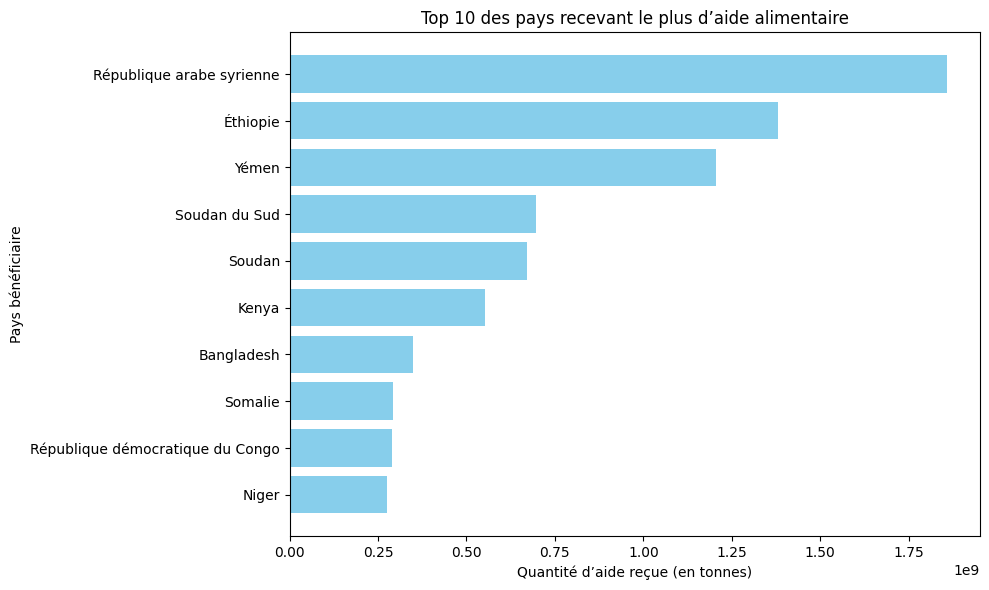

In [124]:
# Regrouper par pays (Zone) et sommer les quantités d’aide alimentaire
aide_totale = aide_alimentaire.groupby("Zone", as_index=False)["Aide Alimentaire"].sum()

# Trier et garder les 10 plus gros bénéficiaires
aide_top10 = aide_totale.sort_values(by="Aide Alimentaire", ascending=False).head(10)

# Affichage
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(aide_top10["Zone"], aide_top10["Aide Alimentaire"], color="skyblue")
plt.title("Top 10 des pays recevant le plus d’aide alimentaire")
plt.xlabel("Quantité d’aide reçue (en tonnes)")
plt.ylabel("Pays bénéficiaire")
plt.gca().invert_yaxis()  # Le pays avec le plus d’aide en haut
plt.tight_layout()
plt.show()
